20


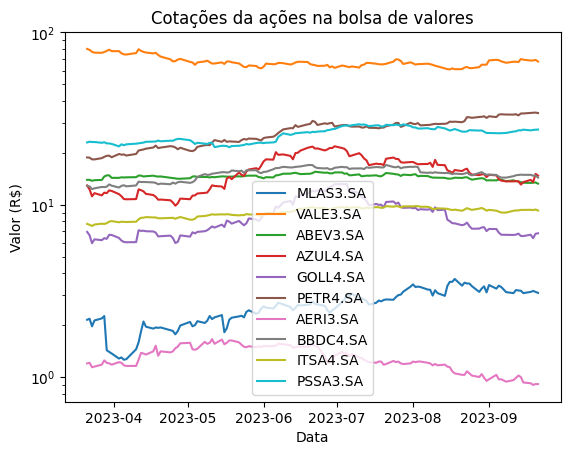

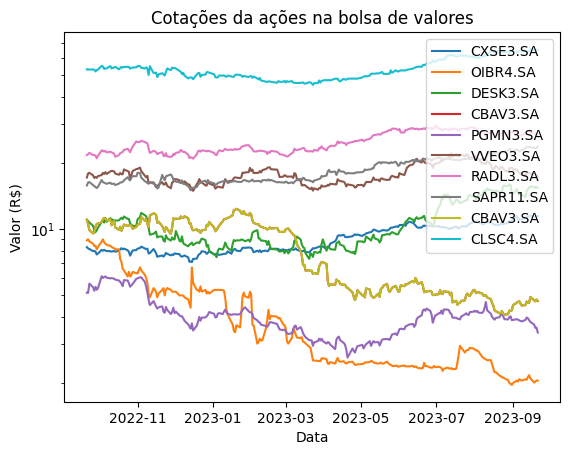

In [20]:
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt

acoes =['MLAS3.SA','VALE3.SA','ABEV3.SA','AZUL4.SA','GOLL4.SA','PETR4.SA','AERI3.SA','BBDC4.SA','ITSA4.SA','PSSA3.SA','CXSE3.SA','OIBR4.SA','DESK3.SA','CBAV3.SA','PGMN3.SA','VVEO3.SA','RADL3.SA','SAPR11.SA','CBAV3.SA','CLSC4.SA']
print(len(acoes))
plt.figure()
for acao in acoes[:10]:
    ticker1 = yf.Ticker(acao)
    # ticker2 = yf.Ticker(acao2)

    data1 = ticker1.history(period='6mo') # O período de 1 ano é suficiente?
    # data2 = ticker2.history(period='1y')

    plt.plot(data1['Close'], label=acao)
plt.ylabel('Valor (R\$)')
plt.title(f'Cotações da ações na bolsa de valores')
plt.xlabel('Data')
plt.semilogy()
plt.legend()
plt.show()


plt.figure()
for acao in acoes[10:]:
    ticker1 = yf.Ticker(acao)
    # ticker2 = yf.Ticker(acao2)

    data1 = ticker1.history(period='1y') # O período de 1 ano é suficiente?
    # data2 = ticker2.history(period='1y')

    plt.plot(data1['Close'], label=acao)
plt.ylabel('Valor (R\$)')
plt.title(f'Cotações da ações na bolsa de valores')
plt.xlabel('Data')
plt.semilogy()
plt.legend()
plt.show()

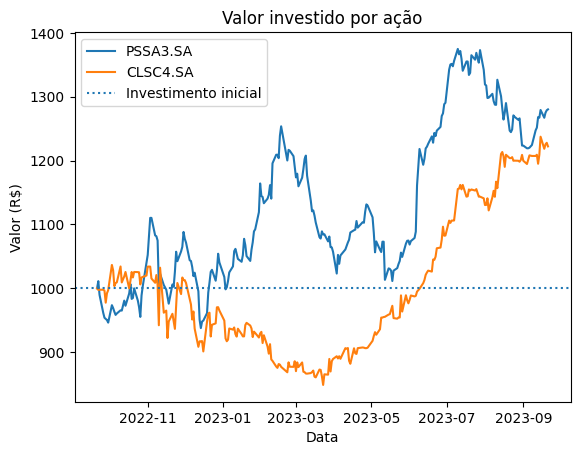

In [12]:
#analise das ações
acao1 = 'CLSC4.SA'
investimento_inicial = 1000
def analise_acoes(data, investimento_inicial):
    n_acoes1 = investimento_inicial / data.iloc[0]['Close']
    data['Valor investido'] = n_acoes1 * data['Close']

data1 = yf.Ticker('PSSA3.SA').history(period='1y')
data2 = yf.Ticker('CLSC4.SA').history(period='1y')

analise_acoes(data1, 1000)
analise_acoes(data2, 1000)

plt.figure()
plt.plot(data1['Valor investido'], label='PSSA3.SA')
plt.plot(data2['Valor investido'], label='CLSC4.SA')
plt.axhline(1000, linestyle=':', label='Investimento inicial')
plt.ylabel('Valor (R\$)')
plt.title('Valor investido por ação')
plt.xlabel('Data')
plt.legend()
plt.show()




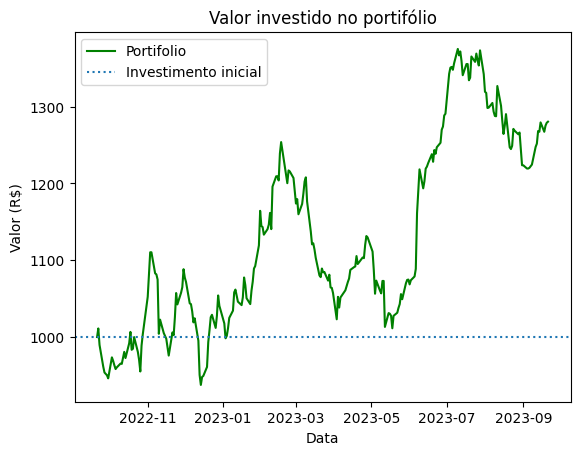

In [13]:
datap = pd.DataFrame()
datap['Valor investido'] = data1['Valor investido']

plt.figure()
plt.plot(datap['Valor investido'],'g',label='Portifolio')
plt.axhline(investimento_inicial, linestyle=':', label='Investimento inicial')
plt.ylabel('Valor (R\$)')
plt.title('Valor investido no portifólio')
plt.xlabel('Data')
plt.legend()
plt.show()

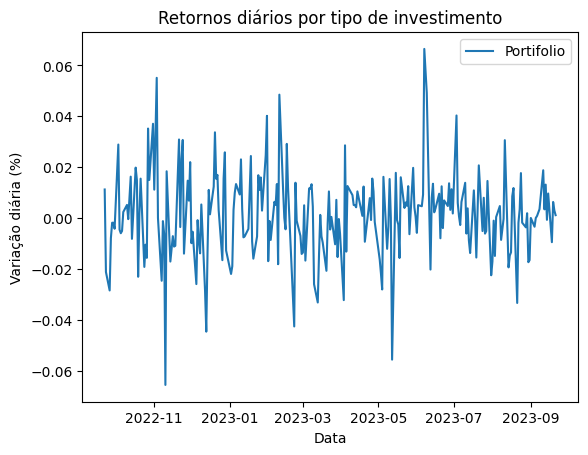

In [14]:




ret1 = data1['Valor investido'].pct_change()
retp = datap['Valor investido'].pct_change()





plt.figure()
plt.plot(retp, label= 'Portifolio')
plt.ylabel('Variação diária (%)')
plt.title('Retornos diários por tipo de investimento')
plt.xlabel('Data')
plt.legend()
plt.show()

In [15]:
# Retornos totais ao longo de todo o período
ret_total1 = (data1.iloc[-1]['Valor investido']/data1.iloc[0]['Valor investido'] - 1)

ret_totalp = (datap.iloc[-1]['Valor investido']/datap.iloc[0]['Valor investido'] - 1)

# Desvios padrões diários
sigma1 = ret1.std()

sigmap = retp.std()

# Índice sharpee
sharpe1 = ret_total1/sigma1

sharpep = ret_totalp/sigmap

print(ret_total1, ret_totalp)
print(sigma1, sigmap)
print(sharpe1, sharpep)

0.2802674466254389 0.2802674466254389
0.01694197675803385 0.01694197675803385
16.542783090086385 16.542783090086385
